In [ ]:
import os
import shutil
import random
import torch

In [ ]:
# Run in a Colab cell
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.54 MiB | 18.82 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 934.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:0

In [ ]:
# Install required packages
!pip install torch torchvision
!pip install opencv-python-headless
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [6]:
import torch
from matplotlib import pyplot as plt
from PIL import Image

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/test_model/best030422.pt', force_reload=True)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-6-20 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1599x899 1 tennis-ball
Speed: 338.1ms pre-process, 355.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 384)


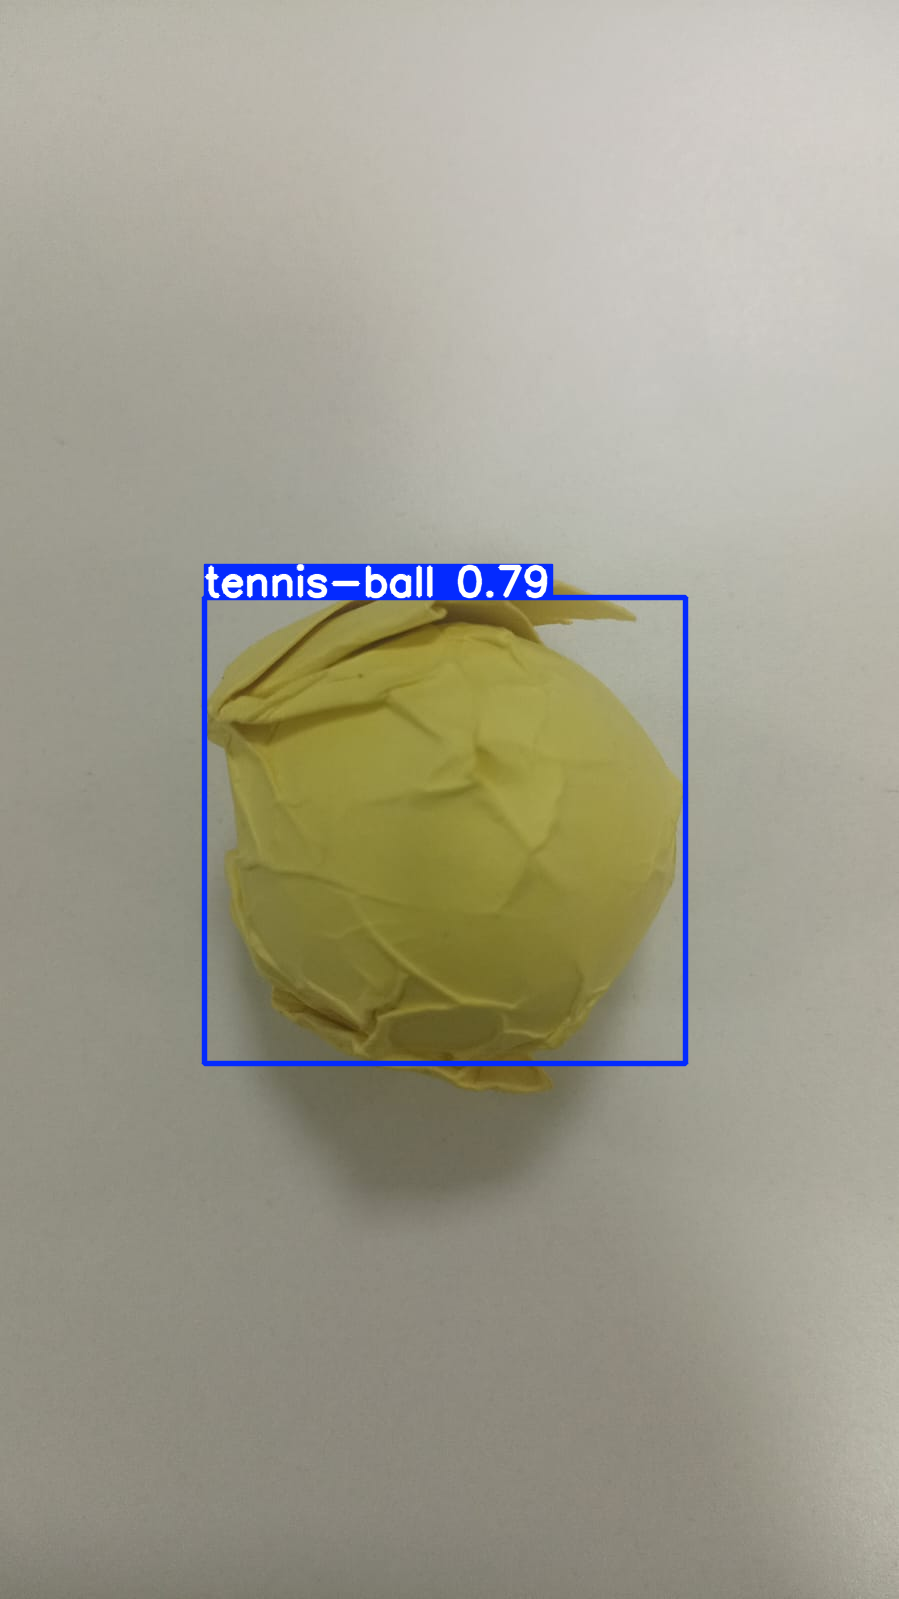

In [7]:
# Inference
img_path = '/content/drive/MyDrive/test_model/ball.jpg'
results = model(img_path)

# Show results
results.print()
results.show()  # Opens image with detections

# Display inline
plt.imshow(Image.open(img_path))
plt.axis('off')
plt.show()

In [10]:
!python detect.py \
--weights /content/drive/MyDrive/test_model/best030422.pt \
--source /content/drive/MyDrive/test_model/final_sample.mp4 \
--project /content/drive/MyDrive/results \
--name trajectory_results \
--conf-thres 0.3 \
--device cpu \
--save-txt \
--save-conf \
--line-thickness 2

YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Processing /content/drive/MyDrive/test_model/final_sample.mp4...
Using depth estimation method: simple
3D trajectory visualization saved to /content/drive/MyDrive/results/trajectory_results35/3d_trajectory_analysis.png
Speed: 0.9ms pre-process, 234.0ms inference, 234.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/results/trajectory_results35
Processed 304 frames with 3D trajectory tracking


In [11]:
# kalmanfilter_3d.py
import numpy as np

class KalmanFilter3D:
    def __init__(self, x=0, y=0, z=0):
        # Initial state [x, y, z, dx, dy, dz]
        self.state = np.array([[x], [y], [z], [0], [0], [0]], dtype=float)

        # State transition matrix (6x6 for 3D position and velocity)
        self.A = np.array([
            [1, 0, 0, 1, 0, 0],  # x = x + dx
            [0, 1, 0, 0, 1, 0],  # y = y + dy
            [0, 0, 1, 0, 0, 1],  # z = z + dz
            [0, 0, 0, 1, 0, 0],  # dx = dx
            [0, 0, 0, 0, 1, 0],  # dy = dy
            [0, 0, 0, 0, 0, 1]   # dz = dz
        ], dtype=float)

        # Measurement matrix (3x6 - we observe x, y, z)
        self.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0]
        ], dtype=float)

        # Process noise covariance (6x6)
        self.Q = np.eye(6) * 0.01

        # Measurement noise covariance (3x3)
        self.R = np.eye(3) * 5

        # Estimate error covariance (6x6)
        self.P = np.eye(6)

    def predict(self):
        """Predict the next state"""
        self.state = np.dot(self.A, self.state)
        self.P = np.dot(self.A, np.dot(self.P, self.A.T)) + self.Q
        return int(self.state[0][0]), int(self.state[1][0]), int(self.state[2][0])

    def correct(self, x, y, z):
        """Update the state with measurement"""
        Z = np.array([[x], [y], [z]])
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.state += np.dot(K, (Z - np.dot(self.H, self.state)))
        self.P = np.dot((np.eye(6) - np.dot(K, self.H)), self.P)

    def get_velocity(self):
        """Get current velocity estimates"""
        return self.state[3][0], self.state[4][0], self.state[5][0]


In [11]:
# detect.py
# detect_3d_enhanced.py - Enhanced 3D Ball Trajectory Tracking for Google Colab
import argparse
import os
import json
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import sys

# Import YOLOv5 dependencies
from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow,
                          colorstr, increment_path, non_max_suppression,
                          print_args, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync

# Import our 3D Kalman filter (you'll need to create this file)
try:
    from kalmanfilter_3d import KalmanFilter3D
except ImportError:
    print("Warning: kalmanfilter_3d.py not found. Creating a simple 3D Kalman filter...")
    # Simple 3D Kalman Filter implementation
    class KalmanFilter3D:
        def __init__(self, x, y, z):
            self.x = x
            self.y = y
            self.z = z
            self.vx = 0
            self.vy = 0
            self.vz = 0

        def predict(self):
            self.x += self.vx
            self.y += self.vy
            self.z += self.vz
            return self.x, self.y, self.z

        def correct(self, mx, my, mz):
            # Simple correction
            self.vx = (mx - self.x) * 0.1
            self.vy = (my - self.y) * 0.1
            self.vz = (mz - self.z) * 0.1
            self.x = mx
            self.y = my
            self.z = mz

class DepthEstimator:
    """Simple depth estimation using MiDaS or fallback method"""
    def __init__(self, method='simple'):
        self.method = method
        if method == 'midas':
            try:
                # Load MiDaS for monocular depth estimation
                self.midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
                self.midas_transform = torch.hub.load("intel-isl/MiDaS", "transforms").small_transform
                self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                self.midas.to(self.device)
                self.midas.eval()
                print("MiDaS depth estimation loaded successfully")
            except Exception as e:
                print(f"Failed to load MiDaS: {e}")
                print("Falling back to simple depth estimation")
                self.method = 'simple'

    def estimate_depth(self, frame, bbox=None):
        """Estimate depth for the entire frame or specific bbox"""
        if self.method == 'midas':
            try:
                # Convert BGR to RGB
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Apply MiDaS transform
                input_tensor = self.midas_transform(rgb).to(self.device)

                # Predict depth
                with torch.no_grad():
                    depth_map = self.midas(input_tensor)
                    depth_map = torch.nn.functional.interpolate(
                        depth_map.unsqueeze(1),
                        size=rgb.shape[:2],
                        mode="bicubic",
                        align_corners=False,
                    ).squeeze()

                depth_map = depth_map.cpu().numpy()

                # If bbox is provided, get depth for that region
                if bbox is not None:
                    x1, y1, x2, y2 = map(int, bbox)
                    x1, y1 = max(0, x1), max(0, y1)
                    x2, y2 = min(frame.shape[1], x2), min(frame.shape[0], y2)
                    roi_depth = depth_map[y1:y2, x1:x2]
                    # Use median depth of the bounding box
                    return float(np.median(roi_depth)) if roi_depth.size > 0 else 100.0

                return depth_map
            except Exception as e:
                print(f"MiDaS depth estimation failed: {e}")
                self.method = 'simple'

        # Fallback: simple depth estimation based on object size
        if bbox is not None:
            x1, y1, x2, y2 = bbox
            area = (x2 - x1) * (y2 - y1)
            # Inverse relationship: larger objects are closer
            estimated_depth = max(50, min(500, 1000 / (area ** 0.5))) if area > 0 else 100
            return float(estimated_depth)
        return 100.0

def scale_coords(img1_shape, coords, img0_shape, ratio_pad=None):
    """Scale coordinates from img1_shape to img0_shape"""
    if ratio_pad is None:
        gain = min(img1_shape[0] / img0_shape[0], img1_shape[1] / img0_shape[1])
        pad = (img1_shape[1] - img0_shape[1] * gain) / 2, (img1_shape[0] - img0_shape[0] * gain) / 2
    else:
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]

    coords[:, [0, 2]] -= pad[0]
    coords[:, [1, 3]] -= pad[1]
    coords[:, :4] /= gain
    return coords

def clip_coords(boxes, shape):
    """Clip coordinates to image boundaries"""
    if isinstance(boxes, torch.Tensor):
        boxes[:, 0].clamp_(0, shape[1])
        boxes[:, 1].clamp_(0, shape[0])
        boxes[:, 2].clamp_(0, shape[1])
        boxes[:, 3].clamp_(0, shape[0])
    else:
        boxes[:, [0, 2]] = boxes[:, [0, 2]].clip(0, shape[1])
        boxes[:, [1, 3]] = boxes[:, [1, 3]].clip(0, shape[0])

def draw_trajectory_3d(frame, cent_hist, pred_hist, trajectory_length=20):
    """Draw trajectory on 2D frame with depth information as color intensity"""
    # Actual trajectory (green with varying intensity based on depth)
    for i in range(max(0, len(cent_hist)-trajectory_length), len(cent_hist)-1):
        if len(cent_hist[i]) >= 3 and len(cent_hist[i+1]) >= 3:
            # Normalize depth for color intensity (closer = brighter)
            depth_norm = min(255, max(50, int(255 - cent_hist[i][2]/5)))
            color = (0, depth_norm, 0)
            # Convert coordinates to integers for OpenCV
            pt1 = (int(cent_hist[i][0]), int(cent_hist[i][1]))
            pt2 = (int(cent_hist[i+1][0]), int(cent_hist[i+1][1]))
            cv2.line(frame, pt1, pt2, color, 2)

    # Predicted trajectory (red with varying intensity)
    for i in range(max(0, len(pred_hist)-trajectory_length), len(pred_hist)-1):
        if len(pred_hist[i]) >= 3 and len(pred_hist[i+1]) >= 3:
            depth_norm = min(255, max(50, int(255 - pred_hist[i][2]/5)))
            color = (0, 0, depth_norm)
            # Convert coordinates to integers for OpenCV
            pt1 = (int(pred_hist[i][0]), int(pred_hist[i][1]))
            pt2 = (int(pred_hist[i+1][0]), int(pred_hist[i+1][1]))
            cv2.line(frame, pt1, pt2, color, 2, cv2.LINE_AA)

    return frame

def create_3d_visualization(cent_hist, pred_hist, save_path):
    """Create 3D visualization of trajectory"""
    if len(cent_hist) == 0:
        return

    fig = plt.figure(figsize=(15, 10))

    # 3D plot
    ax1 = fig.add_subplot(221, projection='3d')

    actual_x = [p[0] for p in cent_hist if len(p) >= 3]
    actual_y = [p[1] for p in cent_hist if len(p) >= 3]
    actual_z = [p[2] for p in cent_hist if len(p) >= 3]

    pred_x = [p[0] for p in pred_hist if len(p) >= 3]
    pred_y = [p[1] for p in pred_hist if len(p) >= 3]
    pred_z = [p[2] for p in pred_hist if len(p) >= 3]

    if len(actual_x) > 0:
        ax1.plot(actual_x, actual_y, actual_z, 'g-', label='Actual Trajectory', linewidth=2)
        ax1.scatter(actual_x[0], actual_y[0], actual_z[0], color='blue', s=100, label='Start')
        ax1.scatter(actual_x[-1], actual_y[-1], actual_z[-1], color='orange', s=100, label='End')

    if len(pred_x) > 0:
        ax1.plot(pred_x, pred_y, pred_z, 'r--', label='Predicted Trajectory', linewidth=2)

    ax1.set_xlabel('X (pixels)')
    ax1.set_ylabel('Y (pixels)')
    ax1.set_zlabel('Depth')
    ax1.set_title('3D Ball Trajectory')
    ax1.legend()

    # X-Y plot
    ax2 = fig.add_subplot(222)
    if len(actual_x) > 0:
        ax2.plot(actual_x, actual_y, 'g-', label='Actual XY', linewidth=2)
        ax2.plot(pred_x, pred_y, 'r--', label='Predicted XY', linewidth=2)
    ax2.set_xlabel('X (pixels)')
    ax2.set_ylabel('Y (pixels)')
    ax2.set_title('X-Y Trajectory')
    ax2.legend()
    ax2.grid(True)

    # Depth over time
    ax3 = fig.add_subplot(223)
    if len(actual_z) > 0:
        time_steps = range(len(actual_z))
        ax3.plot(time_steps, actual_z, 'g-', label='Actual Depth', linewidth=2)
        ax3.plot(range(len(pred_z)), pred_z, 'r--', label='Predicted Depth', linewidth=2)
    ax3.set_xlabel('Frame')
    ax3.set_ylabel('Depth')
    ax3.set_title('Depth Over Time')
    ax3.legend()
    ax3.grid(True)

    # Velocity plot
    ax4 = fig.add_subplot(224)
    if len(actual_x) > 1:
        velocities = []
        for i in range(1, len(actual_x)):
            dx = actual_x[i] - actual_x[i-1]
            dy = actual_y[i] - actual_y[i-1]
            dz = actual_z[i] - actual_z[i-1]
            vel = np.sqrt(dx**2 + dy**2 + dz**2)
            velocities.append(vel)
        ax4.plot(velocities, 'b-', label='3D Velocity', linewidth=2)
    ax4.set_xlabel('Frame')
    ax4.set_ylabel('Velocity (pixels/frame)')
    ax4.set_title('3D Velocity')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

@torch.no_grad()
def run(weights, source, data, imgsz, conf_thres, iou_thres, max_det,
        device, view_img, save_txt, save_conf, save_crop, nosave,
        classes, agnostic_nms, augment, visualize, update,
        project, name, exist_ok, line_thickness, hide_labels,
        hide_conf, half, dnn, depth_method='simple'):

    source = str(source)
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://','rtmp://','http://','https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)

    # Initialize depth estimator
    depth_estimator = DepthEstimator(method=depth_method)

    # Initialize tracking variables
    cent_hist, pred_hist = [], []
    kf = None  # 3D Kalman filter

    # Setup save directory
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)

    # Setup device and model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)

    # Setup data loader
    dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt) if webcam else \
              LoadImages(source, img_size=imgsz, stride=stride, auto=pt)

    # Warm up model
    model.warmup(imgsz=(1, 3, *imgsz))
    dt = [0.0, 0.0, 0.0]
    seen = 0

    # Video writer setup
    dataset_len = len(dataset) if hasattr(dataset, '__len__') else 1
    vid_path, vid_writer = [None]*dataset_len, [None]*dataset_len

    print(f"Processing {source}...")
    print(f"Using depth estimation method: {depth_estimator.method}")

    # Main processing loop
    for path, im, im0s, vid_cap, s in dataset:
        t1 = time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if model.fp16 else im.float()
        im /= 255
        if im.ndim == 3:
            im = im[None]
        dt[0] += time_sync() - t1

        # Inference
        pred = model(im, augment=augment, visualize=visualize)
        dt[1] += time_sync() - t1
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t1

        # Process detections
        for i, det in enumerate(pred):
            seen += 1
            if webcam:
                p, im0 = path[i], im0s[i].copy()
            else:
                p, im0 = path, im0s.copy()

            frame = dataset.count if webcam else getattr(dataset, 'frame', 0)
            save_path = str(save_dir / Path(p).name)

            # Predict next position if filter exists
            if kf is not None:
                px, py, pz = kf.predict()
                px, py, pz = float(px), float(py), float(pz)
            else:
                px = py = pz = None

            # Process detections
            if len(det):
                # Scale coordinates
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Get first detection (assuming single ball tracking)
                *xyxy, conf, cls = det[0]

                # Calculate center point
                cx = int((xyxy[0] + xyxy[2]) / 2)
                cy = int((xyxy[1] + xyxy[3]) / 2)

                # Estimate depth
                cz = depth_estimator.estimate_depth(im0, xyxy)

                # Initialize filter on first detection
                if kf is None:
                    kf = KalmanFilter3D(cx, cy, cz)
                    px, py, pz = kf.predict()
                    px, py, pz = float(px), float(py), float(pz)

                # Update filter with measurement
                kf.correct(cx, cy, cz)

                # Store trajectories
                cent_hist.append((int(cx), int(cy), float(cz)))
                pred_hist.append((float(px), float(py), float(pz)))

                # Draw bounding box and info
                label = f'{names[int(cls)]} {conf:.2f} d:{cz:.1f}'
                annotator = Annotator(im0, line_width=line_thickness, example=str(names))
                annotator.box_label(xyxy, label, color=colors(int(cls), True))

                # Save txt results
                if save_txt:
                    xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / torch.tensor(im0.shape)[[1, 0, 1, 0]]).view(-1).tolist()
                    line = (int(cls), *xywh, conf, float(cz)) if save_conf else (int(cls), *xywh, float(cz))
                    with open(str(save_dir / 'labels' / f'{Path(p).stem}.txt'), 'a') as f:
                        f.write(('%g ' * len(line)).rstrip() % line + '\n')

            # No detection: use prediction if available
            elif kf is not None:
                px, py, pz = float(px), float(py), float(pz)
                cent_hist.append((px, py, pz))
                pred_hist.append((px, py, pz))

            # Draw trajectory
            im0 = draw_trajectory_3d(im0, cent_hist, pred_hist, trajectory_length=50)

            # Display current 3D position
            if len(cent_hist) > 0:
                current_pos = cent_hist[-1]
                pos_text = f'3D Pos: ({current_pos[0]:.0f}, {current_pos[1]:.0f}, {current_pos[2]:.1f})'
                cv2.putText(im0, pos_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                          0.7, (0, 255, 255), 2)

                # Display frame count
                frame_text = f'Frame: {frame}'
                cv2.putText(im0, frame_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX,
                          0.7, (255, 255, 0), 2)

            # Save results
            if save_crop and len(det):
                save_one_box(xyxy, im0s, file=save_dir / 'crops' / names[int(cls)] / f'{Path(p).stem}.jpg', BGR=True)

            # Save video/image
            if not nosave:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix('.mp4'))
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

    # Save trajectory data
    def convert_to_serializable(obj):
        """Convert numpy types to JSON serializable types"""
        if isinstance(obj, (list, tuple)):
            return [convert_to_serializable(item) for item in obj]
        elif isinstance(obj, dict):
            return {key: convert_to_serializable(value) for key, value in obj.items()}
        elif isinstance(obj, (np.floating, float)):
            return float(obj)
        elif isinstance(obj, (np.integer, int)):
            return int(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return obj

    trajectory_data = {
        'actual_3d': convert_to_serializable(cent_hist),
        'predicted_3d': convert_to_serializable(pred_hist),
        'metadata': {
            'total_frames': len(cent_hist),
            'depth_method': depth_estimator.method,
            'model_weights': str(weights),
            'confidence_threshold': conf_thres
        }
    }

    with open(str(save_dir / 'trajectory_3d_data.json'), 'w') as f:
        json.dump(trajectory_data, f, indent=2)

    # Create 3D visualization
    if len(cent_hist) > 0:
        create_3d_visualization(cent_hist, pred_hist, str(save_dir / '3d_trajectory_analysis.png'))
        print(f"3D trajectory visualization saved to {save_dir / '3d_trajectory_analysis.png'}")

    # Print summary
    t = tuple(x / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)

    print(f"Results saved to {save_dir}")
    print(f"Processed {len(cent_hist)} frames with 3D trajectory tracking")

    return cent_hist, pred_hist

def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default='yolov5s.pt', help='model path(s)')
    parser.add_argument('--source', type=str, default='data/images', help='file/dir/URL/glob')
    parser.add_argument('--data', type=str, default='data/coco128.yaml', help='dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --class 0, or --class 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default='runs/detect', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    parser.add_argument('--depth-method', type=str, default='simple', choices=['simple', 'midas'],
                       help='depth estimation method')
    opt = parser.parse_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1
    return opt

def main(opt):
    run(**vars(opt))

if __name__ == "__main__":
    opt = parse_opt()
    main(opt)